### Loading data

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("data/SyriaTel Customers.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#getting familiar with our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

There are 21 columns,none has of them has null values and there is a mix of all data types across the different columns.


In [5]:
data["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [6]:
data["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [7]:
data["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Data wrangling

***Dealing with duplicates***

In [8]:
#checking for duplicates
data.duplicated().value_counts()

False    3333
dtype: int64

Our data doesn't have duplicates.

***Handling missing values***

In [9]:
#checking for null values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As earlier noted,we have confirmed that the data has no missing values


***Checking for outliers***

In [10]:
columns=['account length','number vmail messages','total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
len(columns)

15

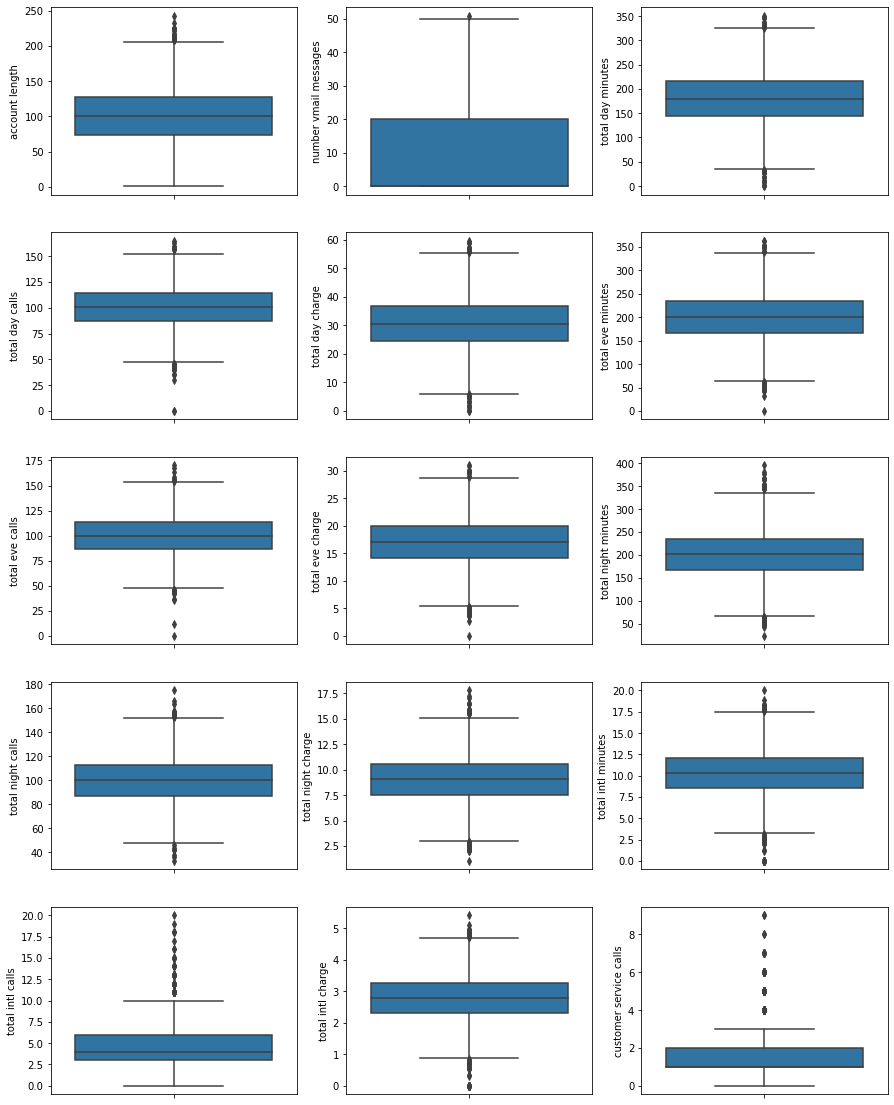

In [11]:
fig,ax=plt.subplots(ncols=3,nrows=5,figsize=(15,20))
index=0
ax=ax.flatten()
for col in data[columns]:
    sns.boxplot(y=col,data=data,ax=ax[index])
    index+=1

In [12]:
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Looks like there are columns with outliers and will have to remove them since machine learning models are sensitive to outliers

In [13]:
#Removing outliers through IQR METHOD
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[columns] < (Q1 - 1.5 * IQR)) |(data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]  
data.describe()     

    

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000
mean,100.416904,437.417974,8.124822,179.991583,100.534950,30.599112,201.214836,100.038516,17.103488,201.150678,100.036377,9.051830,10.308631,4.312411,2.783848,1.304565
std,39.296506,42.527388,13.707670,52.740915,19.310682,8.965888,49.205886,19.224863,4.182556,48.833880,19.059797,2.197581,2.598826,2.073939,0.701609,0.975238
min,1.000000,408.000000,0.000000,35.100000,47.000000,5.970000,64.300000,48.000000,5.470000,65.700000,48.000000,2.960000,3.300000,1.000000,0.890000,0.000000
25%,73.000000,408.000000,0.000000,144.000000,87.000000,24.480000,167.200000,87.000000,14.210000,167.575000,87.000000,7.540000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,179.750000,101.000000,30.560000,201.350000,100.000000,17.115000,201.050000,101.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,19.000000,216.125000,114.000000,36.742500,235.150000,113.000000,19.985000,235.850000,113.000000,10.612500,12.100000,6.000000,3.270000,2.000000
max,205.000000,510.000000,50.000000,324.700000,152.000000,55.200000,337.100000,154.000000,28.650000,334.700000,152.000000,15.060000,17.300000,10.000000,4.670000,3.000000


***Data type conversion***

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2804 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2804 non-null   object 
 1   account length          2804 non-null   int64  
 2   area code               2804 non-null   int64  
 3   phone number            2804 non-null   object 
 4   international plan      2804 non-null   object 
 5   voice mail plan         2804 non-null   object 
 6   number vmail messages   2804 non-null   int64  
 7   total day minutes       2804 non-null   float64
 8   total day calls         2804 non-null   int64  
 9   total day charge        2804 non-null   float64
 10  total eve minutes       2804 non-null   float64
 11  total eve calls         2804 non-null   int64  
 12  total eve charge        2804 non-null   float64
 13  total night minutes     2804 non-null   float64
 14  total night calls       2804 non-null   

In [15]:
data["phone number"]

0       382-4657
1       371-7191
2       358-1921
4       330-6626
5       391-8027
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone number, Length: 2804, dtype: object

In [19]:
#Removing the'-' from the phone number column
data["phone number"]=data["phone number"].replace('-','', regex=True)
data["phone number"]

0       3824657
1       3717191
2       3581921
4       3306626
5       3918027
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 2804, dtype: object

In [21]:
#Changing the data type to interger
data["phone number"]=data["phone number"].astype("int64")
data["phone number"]

0       3824657
1       3717191
2       3581921
4       3306626
5       3918027
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 2804, dtype: int64